DBNO  - 被击倒的敌方玩家数量。
    助攻 - 这名队员受到队友杀害的敌方球员数量。
    boosts  - 使用的增强项数。
    damageDealt  - 造成的总伤害。注意：减去自己造成的伤害。
    headshotKills  - 被爆头杀死的敌方玩家数量。
    治疗 - 使用的治疗项目数。
    Id  - 玩家的ID
    killPlace  - 在被杀死的敌方玩家数量的匹配中排名。
    killPoints  - 基于杀戮的玩家外部排名。 （将其视为Elo排名，只有杀死才重要。）如果rankPoints中的值不是-1，则killPoints中的任何0都应被视为“无”。
    killStreaks  - 在很短的时间内杀死的敌方玩家的最大数量。
    杀死 - 被杀死的敌方玩家数量。
    最长杀 - 玩家和玩家在死亡时被杀的最长距离。这可能会产生误导，因为击倒一名球员并开走可能会导致最长的杀手数据。
    matchDuration  - 以秒为单位的匹配持续时间。
    matchId  - 用于标识匹配的ID。训练和测试集中都没有匹配项。
    matchType  - 标识数据来源的游戏模式的字符串。标准模式是“solo”，“duo”，“squad”，“solo-fpp”，“duo-fpp”和“squad-fpp”;其他模式来自事件或自定义匹配。
    rankPoints  - 类似Elo的玩家排名。此排名不一致，并且在API的下一个版本中已弃用，因此请谨慎使用。 -1的值取代“无”。
    复活 - 此球员复活队友的次数。
    rideDistance  - 以米为单位测量的车辆总行驶距离。
    roadKills  - 车辆中的杀伤次数。
    swimDistance  - 游泳行程的总距离，以米为单位。
    teamKills  - 该球员杀死队友的次数。
    vehicleDestroys  - 销毁的车辆数量。
    walkDistance  - 以米为单位的徒步旅行总距离。
    weaponAcquired  - 拾取的武器数量。
    winPoints  - 基于胜利的玩家外部排名。 （将其视为Elo排名，只有获胜才有意义。）如果rankPoints中的值不是-1，那么winPoints中的任何0都应被视为“无”。
    groupId  - 用于标识匹配中的组的ID。如果同一组玩家在不同的比赛中比赛，他们每次都会有不同的groupId。
    numGroups  - 匹配中我们有数据的组数。
    maxPlace  - 最差的位置我们在比赛中有数据。这可能与numGroups不匹配，因为有时数据会跳过展示位置。
    winPlacePerc  - 预测的目标。这是一个百分位获胜位置，其中1对应于第一名，0对应于比赛中的最后一名。它是根据maxPlace计算的，而不是numGroups，因此匹配中可能缺少块。

In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

import os

Python version: 3.6.2 |Anaconda custom (64-bit)| (default, Jul 20 2017, 12:30:02) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.23.4
matplotlib version: 2.0.2
NumPy version: 1.15.4
SciPy version: 1.1.0
IPython version: 7.2.0
scikit-learn version: 0.20.0
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model,neural_network, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBRegressor

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
# matplotlib中文显示
plt.rcParams['font.sans-serif']=['simhei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [6]:
root = 'C:/Users/hujia/Documents/JupyterNotebook/all/'
data_raw = pd.read_csv(root+'train_V2.csv',nrows = 200000)
data_raw = reduce_men_usage(data_raw)
data_val = pd.read_csv(root+'test_V2.csv')
data_val = reduce_men_usage(data_val)
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]
print (data_raw.info())
#data_raw.head() 
#data_raw.tail() 
data_raw.sample(10)
data_val.info()

NameError: name 'reduce_men_usage' is not defined

In [13]:
def label_text(ax,series):
    label,number = series.value_counts().index.tolist(),series.value_counts().values.tolist()
    for a,b in zip(label,number):
        ax.text(a,b,'%d'%int(b),ha = 'center',va = 'bottom',fontsize = 14)

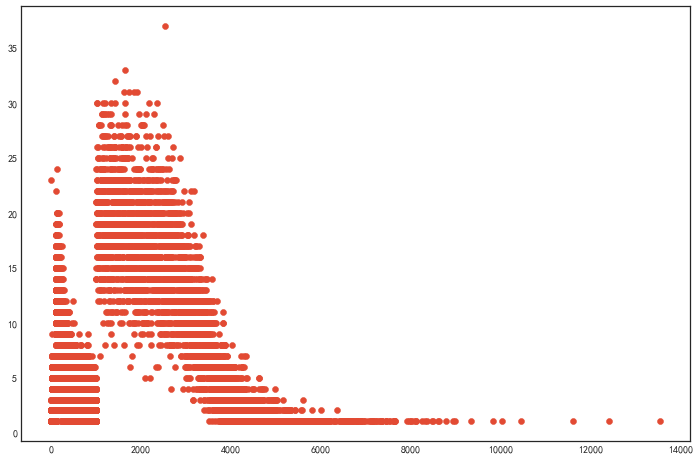

In [14]:
x = data1['walkDistance'].value_counts().index.tolist()
y = data1['walkDistance'].value_counts().values.tolist()
plt.scatter(x[1:],y[1:])
plt.show()

In [15]:
print(data1.isnull().sum())
print(data_val.isnull().sum())

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0


In [10]:
data1['winPlacePerc'].fillna(data1['winPlacePerc'].mode()[0],inplace = True)

In [338]:
drop_columns = ['Id', 'groupId', 'matchId']
data1.drop(drop_columns, axis=1, inplace = True)

In [17]:
data1.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [339]:
for dataset in data_cleaner:
    dataset['damageDealt_bin'] = pd.cut(dataset['damageDealt'],5)
    dataset['total_distance'] = dataset['rideDistance']+dataset['swimDistance']+dataset['walkDistance']
    dataset['total_distance_bin'] = pd.cut(dataset['total_distance'],5)
    dataset['longestKill_bin'] = pd.cut(dataset['longestKill'],5)
    dataset['health'] = dataset['boosts']+dataset['heals']

In [19]:
data1['matchType'].value_counts()

squad-fpp           39668
duo-fpp             22368
squad               14102
solo-fpp            12130
duo                  6876
solo                 4088
normal-squad-fpp      364
crashfpp              151
normal-duo-fpp        125
normal-solo-fpp        40
flaretpp               40
normal-squad           19
flarefpp               17
crashtpp                6
normal-duo              4
normal-solo             2
Name: matchType, dtype: int64

In [20]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['matchType_code'] = label.fit_transform(dataset['matchType'])
    dataset['damageDealt_code'] = label.fit_transform(dataset['damageDealt_bin'])
    dataset['total_distance_code'] = label.fit_transform(dataset['total_distance_bin'])
    dataset['longestKill_code'] = label.fit_transform(dataset['longestKill_bin'])

In [340]:
data1.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'damageDealt_bin', 'total_distance',
       'total_distance_bin', 'longestKill_bin', 'health'],
      dtype='object')

In [22]:
data1.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,winPoints,winPlacePerc,damageDealt_bin,total_distance,total_distance_bin,longestKill_bin,matchType_code,damageDealt_code,total_distance_code,longestKill_code
0,0,0,0.00,0,0,0,60,1241,0,0,...,1466,0.4444,"(-3.725, 745.0]",244.8000,"(-28.918, 5783.5]","(-0.954, 190.72]",15,0,0,0
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.6400,"(-3.725, 745.0]",1445.0445,"(-28.918, 5783.5]","(-0.954, 190.72]",15,0,0,0
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.7755,"(-3.725, 745.0]",161.8000,"(-28.918, 5783.5]","(-0.954, 190.72]",2,0,0,0
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.1667,"(-3.725, 745.0]",202.7000,"(-28.918, 5783.5]","(-0.954, 190.72]",15,0,0,0
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.1875,"(-3.725, 745.0]",49.7500,"(-28.918, 5783.5]","(-0.954, 190.72]",13,0,0,0


In [341]:
data1_x = ['assists', 'boosts',  'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 
        'matchType', 
       'revives', 'roadKills',  'teamKills',
       'vehicleDestroys',  'weaponsAcquired', 
        'damageDealt_code','longestKill_code',
       'total_distance_code']
target = ['winPlacePerc']

In [24]:
for x in data1_x:
    print('winPlacePerc Correlation by: ',x)
    print(data1[[x,'winPlacePerc']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

winPlacePerc Correlation by:  assists
    assists  winPlacePerc
0         0      0.431836
1         1      0.633194
2         2      0.768157
3         3      0.852759
4         4      0.868525
5         5      0.878193
6         6      0.777025
7         7      0.726529
8         8      0.788429
9         9      0.828550
10       11      0.357100
11       13      0.692300
---------- 

winPlacePerc Correlation by:  boosts
    boosts  winPlacePerc
0        0      0.300487
1        1      0.562207
2        2      0.680278
3        3      0.776408
4        4      0.828145
5        5      0.867496
6        6      0.890230
7        7      0.915088
8        8      0.928966
9        9      0.935432
10      10      0.932387
11      11      0.957359
12      12      0.959637
13      13      0.947214
14      14      0.934825
15      21      0.918400
---------- 

winPlacePerc Correlation by:  DBNOs
    DBNOs  winPlacePerc
0       0      0.420357
1       1      0.498915
2       2      0.598185
3   

winPlacePerc Correlation by:  assists
---------- 



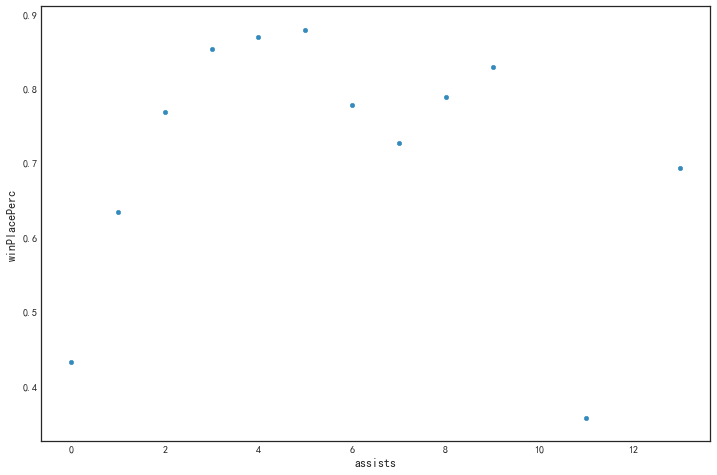

winPlacePerc Correlation by:  boosts
---------- 



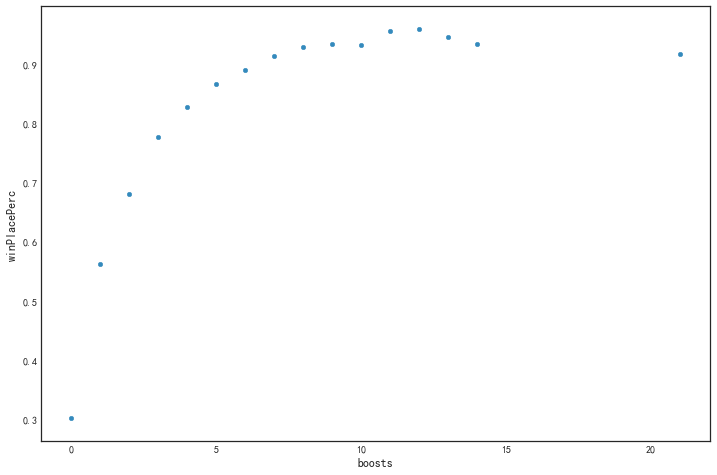

winPlacePerc Correlation by:  damageDealt
---------- 



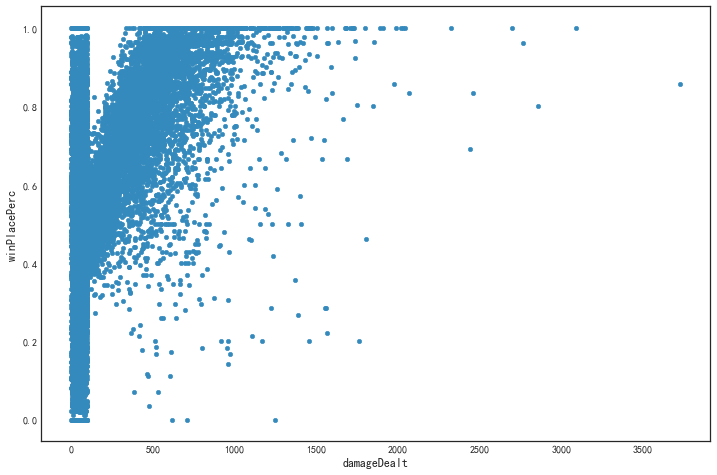

winPlacePerc Correlation by:  DBNOs
---------- 



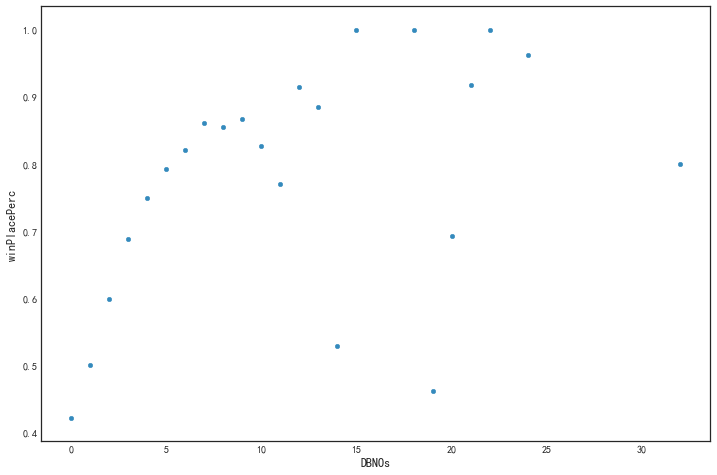

winPlacePerc Correlation by:  headshotKills
---------- 



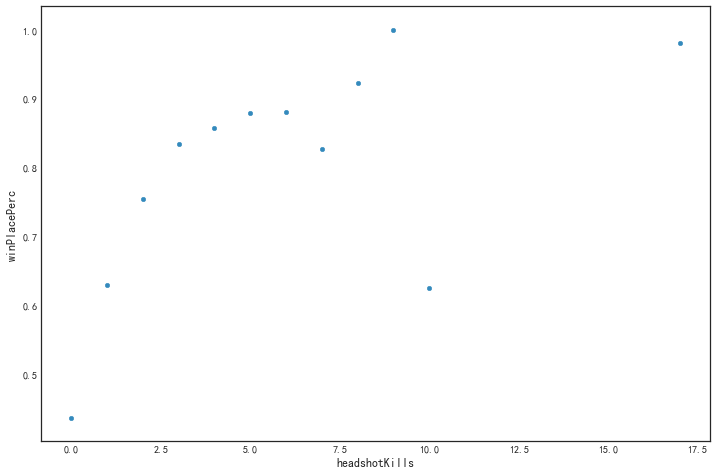

winPlacePerc Correlation by:  heals
---------- 



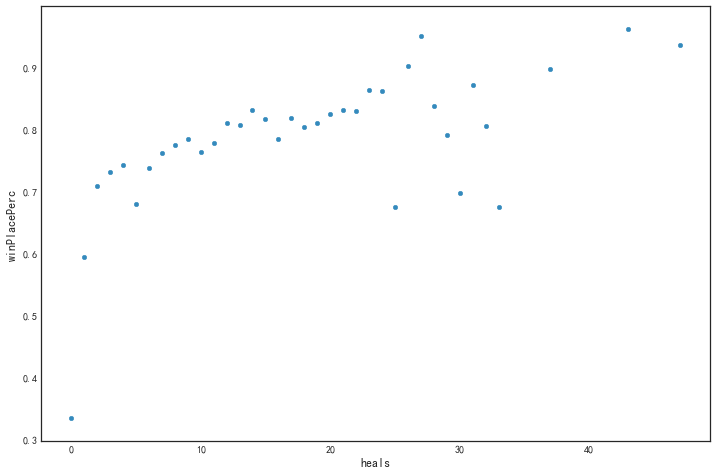

winPlacePerc Correlation by:  kills
---------- 



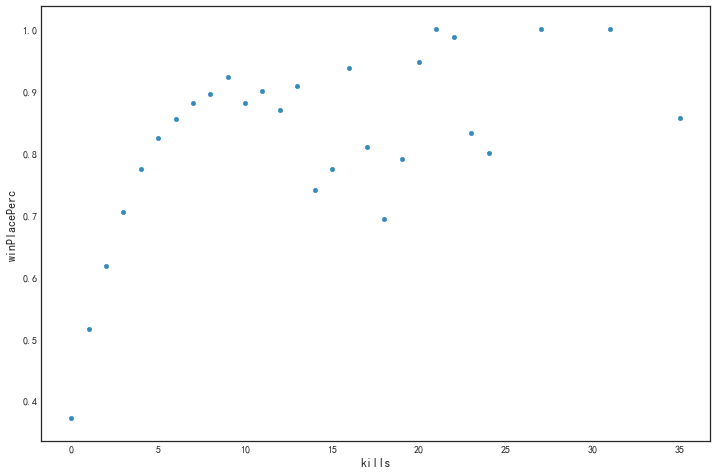

winPlacePerc Correlation by:  killStreaks
---------- 



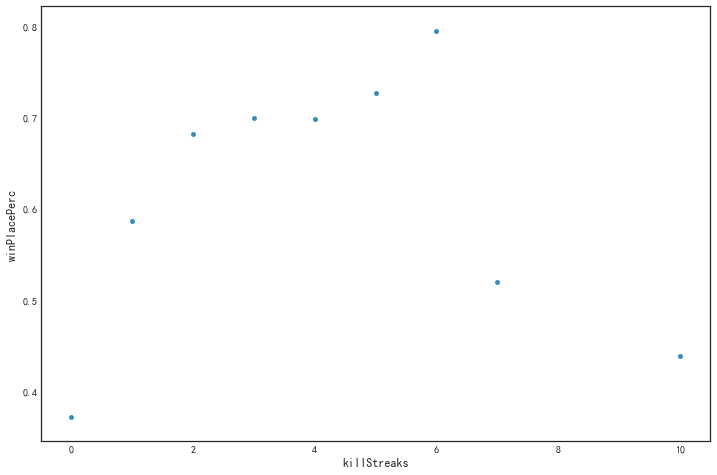

winPlacePerc Correlation by:  longestKill
---------- 



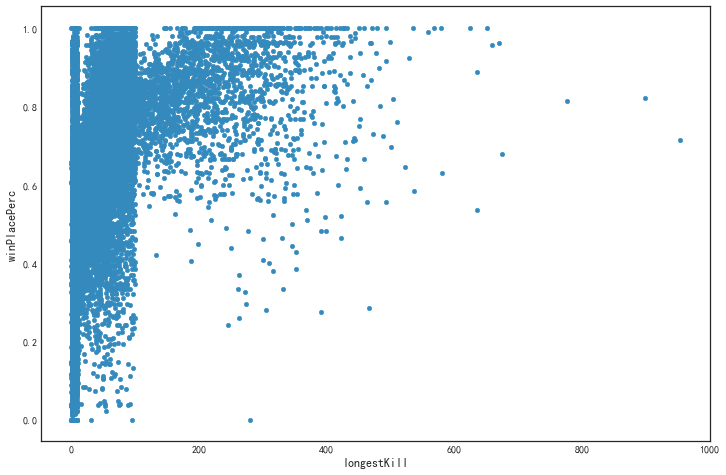

winPlacePerc Correlation by:  revives
---------- 



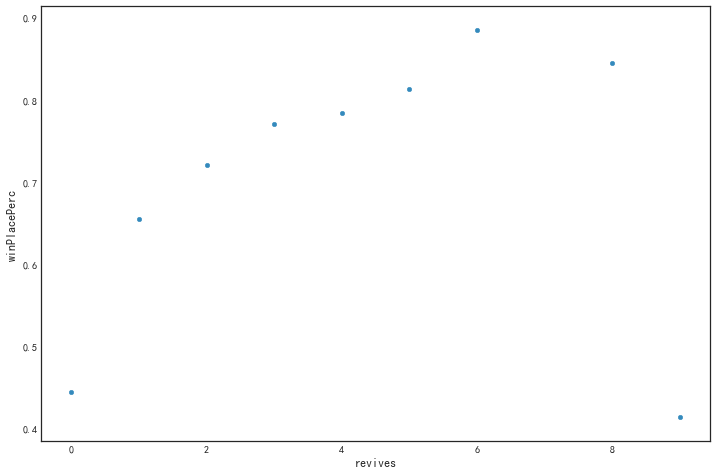

winPlacePerc Correlation by:  rideDistance
---------- 



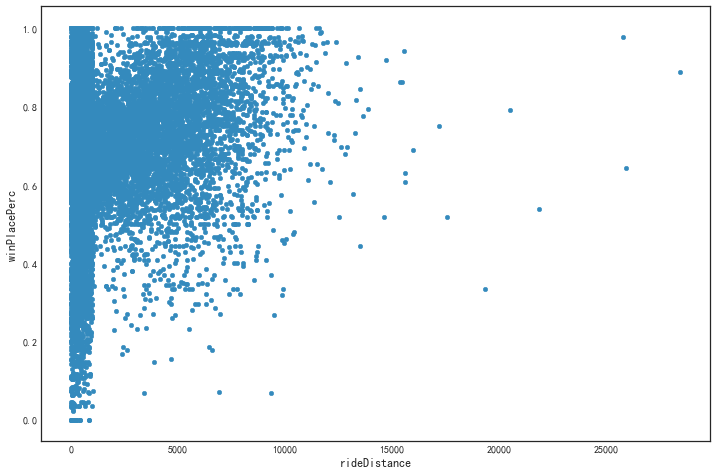

winPlacePerc Correlation by:  roadKills
---------- 



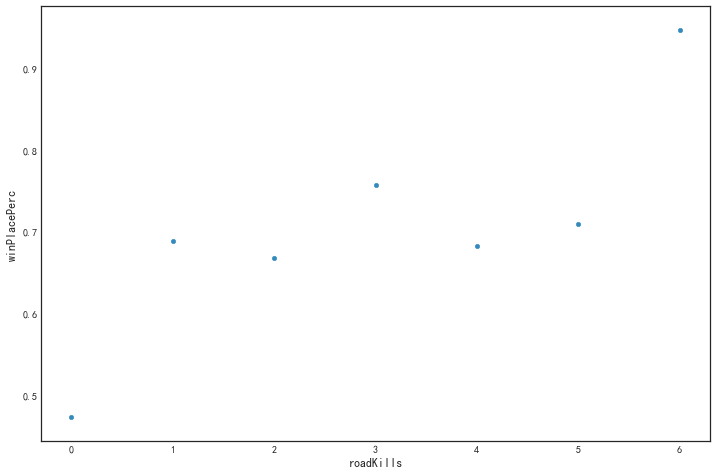

winPlacePerc Correlation by:  swimDistance
---------- 



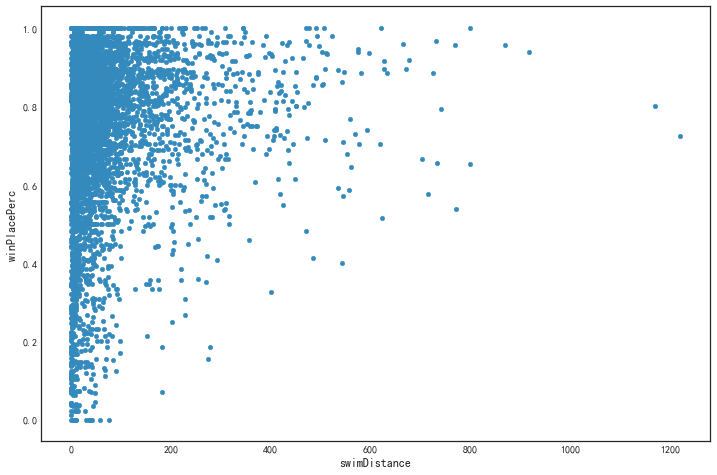

winPlacePerc Correlation by:  teamKills
---------- 



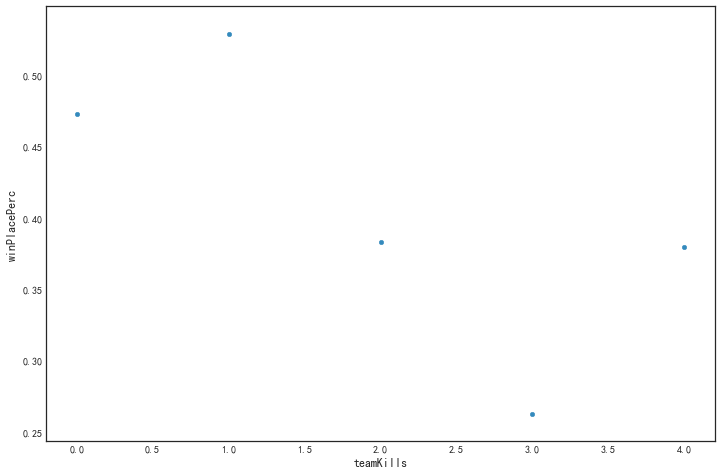

winPlacePerc Correlation by:  vehicleDestroys
---------- 



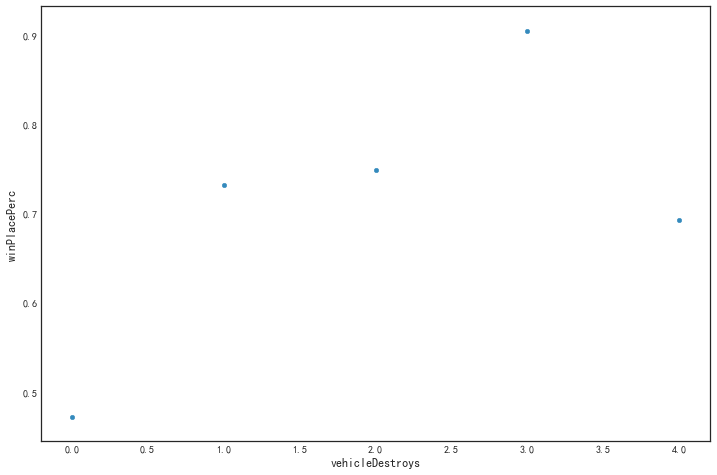

winPlacePerc Correlation by:  walkDistance
---------- 



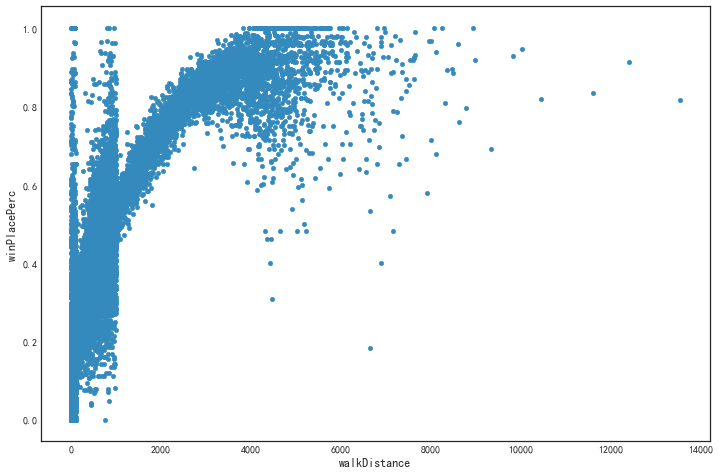

winPlacePerc Correlation by:  weaponsAcquired
---------- 



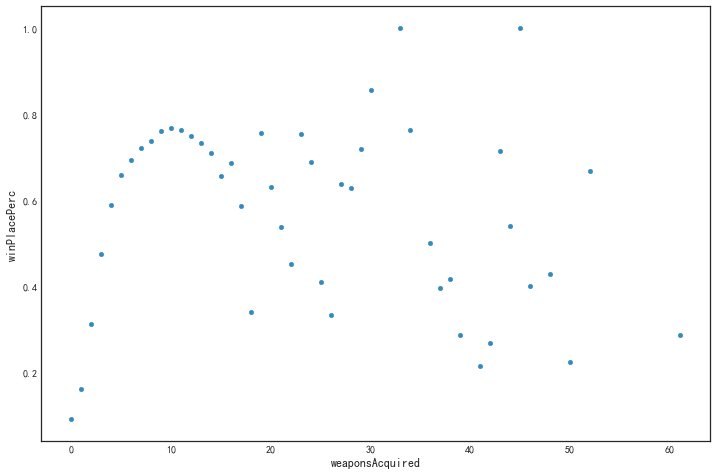

In [65]:
for x in data1_k:
    fig,ax = plt.subplots()
    print('winPlacePerc Correlation by: ',x)
    m = data1[[x,'winPlacePerc']].groupby(x, as_index=False).mean()
    m.plot(kind = 'scatter',x = x,y = 'winPlacePerc',ax = ax)
    print('-'*10, '\n')
    plt.show()

In [323]:
data1_xx = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace','kills', 'killStreaks', 'longestKill',
       'revives', 'rideDistance',  'swimDistance', 
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 
         'total_distance','health','winPlacePerc']

data1_xxx = [ 
        'roadKills',  'teamKills',
       'vehicleDestroys',  'weaponsAcquired','damageDealt_code','longestKill_code',
       'total_distance_code']

In [324]:
pp = sns.pairplot(data1[data1_xx], palette = 'deep', diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


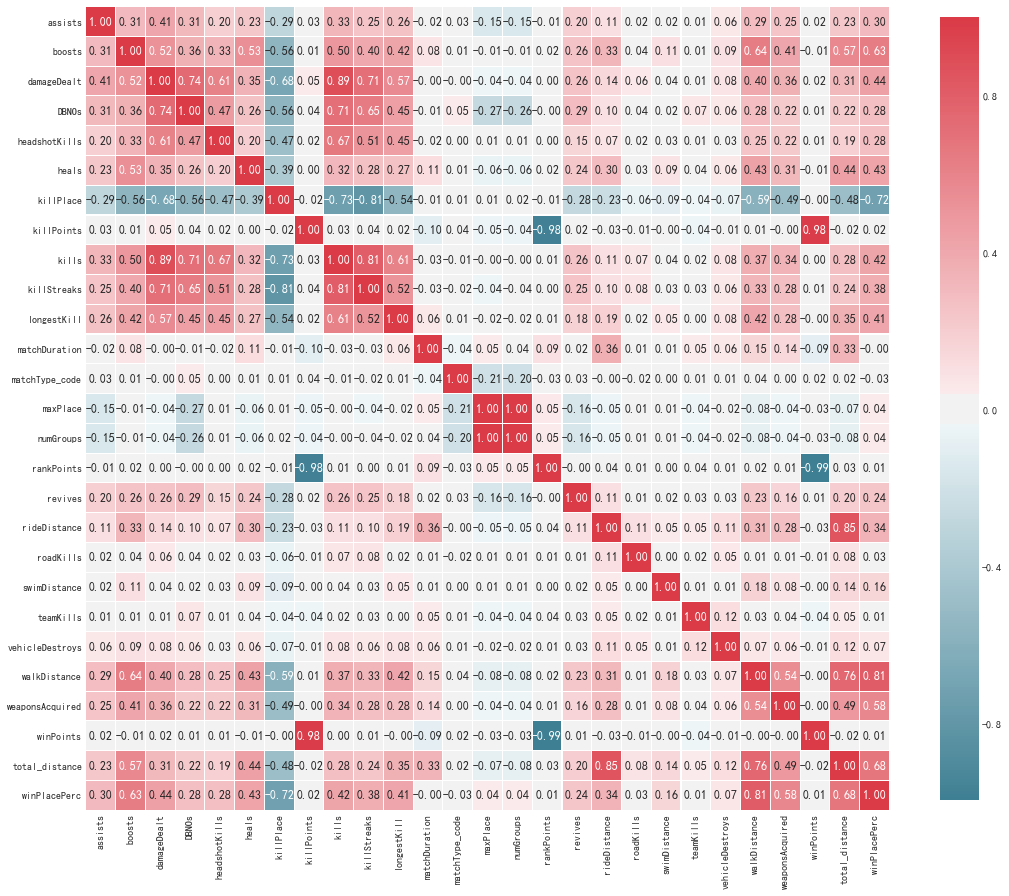

In [30]:
data1_h = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType_code', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'total_distance','winPlacePerc'
        ]
fig,axs = plt.subplots(figsize = (18,16))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
hm = sns.heatmap(
        data1[data1_h].corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=axs,
        fmt='.2f',
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    

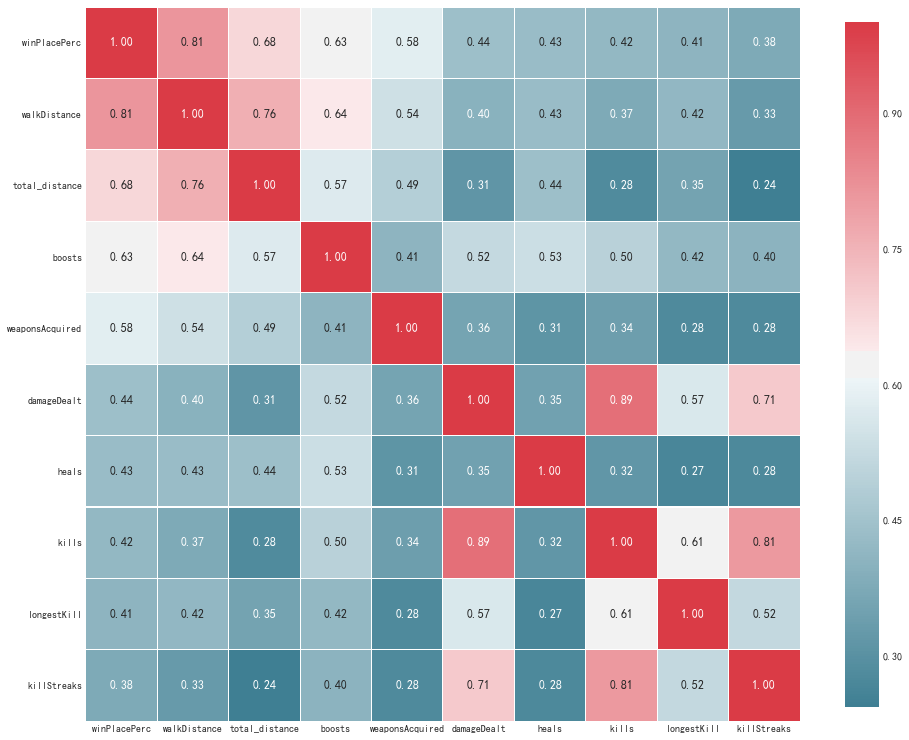

In [31]:
k =10
cols = data1[data1_h].corr().nlargest(k, 'winPlacePerc').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(data1[cols].values.T)

fig,ax = plt.subplots(figsize = (16,14))
hn = sns.heatmap(
        cm, 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        fmt='.2f',
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',yticklabels=cols.values, xticklabels=cols.values,
        annot_kws={'fontsize':12 }
    )
plt.show()

In [21]:
data1_wan = data1[1:20000]
data1_wan.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,damageDealt_bin,total_distance,total_distance_bin,longestKill_bin,matchType_code,damageDealt_code,total_distance_code,longestKill_code
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,"(-6.616, 1323.2]",1445.0445,"(-41.27, 8254.02]","(-1.094, 218.8]",15,0,0,0
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,"(-6.616, 1323.2]",161.8000,"(-41.27, 8254.02]","(-1.094, 218.8]",2,0,0,0
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,"(-6.616, 1323.2]",202.7000,"(-41.27, 8254.02]","(-1.094, 218.8]",15,0,0,0
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,"(-6.616, 1323.2]",49.7500,"(-41.27, 8254.02]","(-1.094, 218.8]",13,0,0,0
5,0,0,100.00,1,1,0,44,0,1,1,18.44,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370,"(-6.616, 1323.2]",34.7000,"(-41.27, 8254.02]","(-1.094, 218.8]",15,0,0,0


In [22]:
MLA = [
    
    #GLM
    linear_model.LogisticRegressionCV(max_iter = 10000),
    linear_model.SGDRegressor(),
    linear_model.Perceptron(),
    linear_model.ARDRegression(),
    linear_model.BayesianRidge(),
    linear_model.ElasticNet(max_iter = 10000),
    
    #SVM
    svm.LinearSVC(),
    
    #neural networks
    neural_network.MLPRegressor(max_iter = 10000),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBRegressor()    
    ]

In [120]:

'''
data_t = ['boosts',  'heals',
       'killPlace', 'killPoints', 'kills', 'roadKills',
        'weaponsAcquired', 
       'damageDealt_code', 'total_distance_code', 'longestKill_code']
'''
data_t = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace',  'kills', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'swimDistance', 
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 
       'total_distance'
        ]

In [ ]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = data1_wan[target]

row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    cv_results = model_selection.cross_validate(alg, data1_wan[data_t], data1_wan[target].values.ravel().astype('int'), cv  = cv_split)
    #print(cv_results)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1_wan[data_t], data1_wan[target].values.ravel().astype('int'))
    MLA_predict[MLA_name] = alg.predict(data1_wan[data_t])
    
    row_index+=1

   
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

In [ ]:
for value in MLA_compare['MLA Parameters'].values.tolist():
    mla_name = MLA_compare.loc[MLA_compare['MLA Parameters'] == value]['MLA Name']
    print('model name:',mla_name)
    print(value)
    print('\n')

In [ ]:
cv_results

In [ ]:
MLA_compare['MLA Name'][0:5]

In [ ]:
vote_test = [
    ('lrc',linear_model.LogisticRegressionCV()),
    #('pr', linear_model.Perceptron()),
    ('lda',discriminant_analysis.LinearDiscriminantAnalysis()),    
    ('gnb',naive_bayes.GaussianNB()),
    ('bnb',naive_bayes.BernoulliNB()),
    
]

vote_hard = ensemble.VotingClassifier(estimators = vote_test , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1_wan[data_t], data1_wan[target].values.ravel().astype('int'), cv  = cv_split)
vote_hard.fit(data1_wan[data_t], data1_wan[target].values.ravel().astype('int'))

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_test , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1_wan[data_t], data1_wan[target].values.ravel().astype('int'), cv  = cv_split)
vote_soft.fit(data1_wan[data_t], data1_wan[target].values.ravel().astype('int'))

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

In [ ]:
print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)
print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

In [342]:
data1.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'damageDealt_bin', 'total_distance',
       'total_distance_bin', 'longestKill_bin', 'health'],
      dtype='object')

In [343]:
data_t = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace',  'kills', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'swimDistance', 
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 
       'total_distance'
        ]
data1_k = [ 'walkDistance', 'total_distance', 'boosts',
       'weaponsAcquired', 'damageDealt', 'heals', 'kills', 'longestKill',
       'killStreaks'
      ]
data_n  = ['boosts',
           'killPlace',
'damageDealt',
'heals',
'kills',
'killStreaks',
'longestKill',
'rideDistance',
'walkDistance',
'weaponsAcquired',
'total_distance',
           'health'
          ]

In [344]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data1[data_n],data1[target],train_size = 0.8)

In [345]:
x_train.head()

,boosts,killPlace,damageDealt,heals,kills,killStreaks,longestKill,rideDistance,walkDistance,weaponsAcquired,total_distance,health
399665,0,42,100.00,0,1,1,5.515,0.0,130.90,1,130.90,0
1531145,0,100,85.24,0,0,0,0.000,0.0,96.63,2,96.63,0
1910948,3,29,63.80,1,1,1,5.819,2669.0,1143.00,4,3812.00,4
126435,0,93,0.00,0,0,0,0.000,0.0,29.72,1,29.72,0
759581,0,75,0.00,0,0,0,0.000,0.0,167.20,2,167.20,0


In [346]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )

In [347]:
%%time
from sklearn import tree
#贝叶斯岭回归 0.8051
#md = linear_model.BayesianRidge()
#决策树回归 为 0.8589
md_t = tree.DecisionTreeRegressor(max_depth = 8,max_features = 'auto')
#LassoCV 0.7
#md = linear_model.LassoCV()
#线性感知机 0.6
#md = neural_network.MLPRegressor(activation = 'logistic',alpha = 0.001,hidden_layer_sizes = 2,solver = 'sgd',learning_rate_init = 0.01,momentum = 0.6,early_stopping = True)
#AdaBoost回归 0.8739
#md = ensemble.AdaBoostRegressor(md_t,learning_rate = 0.1,n_estimators = 150)
#Bagging回归 0.8737
#md = ensemble.BaggingRegressor(md_t,n_estimators = 100)
#GBR为0.886
md = ensemble.GradientBoostingRegressor(learning_rate = 0.1,n_estimators = 300)
#RFG为0.8721
#md = ensemble.RandomForestRegressor(n_estimators = 50)
#简单线性回归 0.8
#md = linear_model.LinearRegression()
#ExtraTree 0.8461
#md = tree.ExtraTreeRegressor(max_depth = 10)

md.fit(x_train,y_train)
mdcv = model_selection.cross_validate(md,x_test,y_test,cv = cv_split)
print(mdcv)
print('测试集平均得分：',round(mdcv['test_score'].mean(),4))

{'fit_time': array([ 196.32773757,  204.96470237,  158.51528215,  139.50206876,
        154.67757273,  223.91602993,  184.41544247,  180.87836814,
        145.14202905,  211.18381786]), 'score_time': array([ 1.26596808,  1.1788795 ,  0.93948698,  0.88463688,  3.23634624,
        1.05520487,  0.92751932,  0.93749261,  1.03025031,  1.13796759]), 'test_score': array([ 0.88756378,  0.88713135,  0.88642861,  0.88842083,  0.88838951,
        0.88657578,  0.88798957,  0.88843949,  0.88750278,  0.88771364]), 'train_score': array([ 0.88957718,  0.88956012,  0.88975104,  0.88886223,  0.88922675,
        0.88975726,  0.88958595,  0.88926948,  0.88944122,  0.88940372])}
测试集平均得分： 0.8876


In [348]:
print(x_test.head())
md.predict(x_test.head())

         boosts  killPlace  damageDealt  heals  kills  killStreaks  \
745475        1         22        90.73      1      1            1   
1285080       7          9       300.00      1      3            1   
1701344       0         92         0.00      0      0            0   
190449        2         18       105.60      3      2            2   
301794        0         44       174.10      0      1            1   

         longestKill  rideDistance  walkDistance  weaponsAcquired  \
745475       124.300         860.2       2693.00                5   
1285080       34.120           0.0       2250.00                3   
1701344        0.000           0.0          0.00                0   
190449        31.190        5575.0       1362.00                8   
301794         5.316           0.0         50.35                1   

         total_distance  health  
745475          3777.70       2  
1285080         2250.00       8  
1701344            0.00       0  
190449          6937.00     

array([ 0.86588182,  0.87242468,  0.00232478,  0.61805029,  0.09889646])

In [349]:
data1.ix[1285080]

assists                                0
boosts                                 7
damageDealt                          300
DBNOs                                  0
headshotKills                          0
heals                                  1
killPlace                              9
killPoints                          1444
kills                                  3
killStreaks                            1
longestKill                        34.12
matchDuration                       1356
matchType                       solo-fpp
maxPlace                              98
numGroups                             97
rankPoints                            -1
revives                                0
rideDistance                           0
roadKills                              0
swimDistance                           0
teamKills                              0
vehicleDestroys                        0
walkDistance                        2250
weaponsAcquired                        3
winPoints       

In [49]:
y_train

,winPlacePerc
84984,0.5208
85096,0.8182
89899,0.2708
50610,0.8043
10052,0.0357
31520,0.4479
59971,0.4074
72494,0.0213
31941,0.7979
9503,0.8571


In [189]:
t = data1[data1_h].corr().ix['winPlacePerc']>0.3


assists            False
boosts              True
damageDealt         True
DBNOs              False
headshotKills      False
heals               True
killPlace          False
killPoints         False
kills               True
killStreaks         True
longestKill         True
matchDuration      False
matchType_code     False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance        True
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance        True
weaponsAcquired     True
winPoints          False
total_distance      True
winPlacePerc        True
Name: winPlacePerc, dtype: bool

In [192]:
for i in range(len(t)):
    if t[i] == True:
        print(str(t.index[i]))

boosts
damageDealt
heals
kills
killStreaks
longestKill
rideDistance
walkDistance
weaponsAcquired
total_distance
winPlacePerc


In [85]:
x_test.shape

(20000, 17)

In [167]:
cols

Index(['winPlacePerc', 'walkDistance', 'total_distance', 'boosts',
       'weaponsAcquired', 'damageDealt', 'heals', 'kills', 'longestKill',
       'killStreaks'],
      dtype='object')

In [330]:
data_val.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,damageDealt_bin,total_distance,total_distance_bin,longestKill_bin,matchType_code,damageDealt_code,total_distance_code,longestKill_code,health
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0,"(-1.757, 351.4]",588.0,"(-19.568, 3913.68]","(-0.941, 188.26]",14,0,0,0,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,0,"(-1.757, 351.4]",6686.0,"(3913.68, 7827.36]","(188.26, 376.52]",3,0,1,1,6
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0,"(-1.757, 351.4]",787.8,"(-19.568, 3913.68]","(-0.941, 188.26]",14,0,0,0,4
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0,"(-1.757, 351.4]",1812.0,"(-19.568, 3913.68]","(-0.941, 188.26]",3,0,0,0,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,0,"(-1.757, 351.4]",2963.0,"(-19.568, 3913.68]","(-0.941, 188.26]",14,0,0,0,5


In [350]:
data_val['winPlacePerc'] = md.predict(data_val[data_n])
submit = data_val[['Id','winPlacePerc']]
submit

,Id,winPlacePerc
0,9329eb41e215eb,0.252759
1,639bd0dcd7bda8,0.885822
2,63d5c8ef8dfe91,0.671292
3,cf5b81422591d1,0.626730
4,ee6a295187ba21,0.933986
5,3e2539b5d78183,0.003818
6,d812d2f1d88a02,0.661294
7,a8a377e4d43bf8,0.280934
8,f18301e30d47d3,0.549733
9,ec7b965ef978b3,0.627472


In [351]:
submit.to_csv('pubg.csv',index = False)